In [27]:
import numpy as np

# Define the system matrices given
A = np.array([[0.9863, 0.0528],
              [-0.1189, 1.1680]])
B = np.array([[0.0024],
              [0.0628]])
Q = np.array([[1, 0],
              [0, 0.5]])
# R = np.array([[1]])  ##for part a and b
R = np.array([[5]])  ##for part e

# Set the number of stages (horizon)
N = 3  # for part b 200

In [28]:
import numpy as np


H = np.array([[1, 0],
              [0, 0]])

# Updated initial state
x0 = np.array([[2], [1]])

# New horizon
N = 3

# Initialize P with the final cost
P = H.copy()

# Initialize matrices to store F and P for each stage
F = np.zeros((N, B.shape[1], A.shape[0]))
P_stages = np.zeros((N+1, A.shape[0], A.shape[1]))

P_stages[-1] = P

# Backward recursion for the Riccati difference equation
for k in range(N-1, -1, -1):
    # Calculate the feedback gain F
    F[k] = np.linalg.inv(R + B.T @ P @ B) @ (B.T @ P @ A)
    # Update the cost-to-go matrix P
    # P = (A + B @ F).T @ P @ (A + B @ F) + F.T @ R @ F + Q
    P = A.T @ P @ A - (A.T @ P @ B) @ np.linalg.inv(R + B.T @ P @ B) @ (B.T @ P @ A) + Q

    # Store the stage cost-to-go
    P_stages[k] = P

# Forward recursion to simulate the system response
x = x0.copy()
u = np.zeros((N, B.shape[1], 1))

# Cost function J
J = 0

# System response simulation
for k in range(N):
    # Calculate control input
    u[k] = -F[k] @ x
    # Update cost J
    J += x.T @ Q @ x + u[k].T @ R @ u[k]
    # State update equation
    x = A @ x + B @ u[k]

# Extract the steady-state gain F_s and cost-to-go P_s
F_s = F[0]  # Steady-state gain is reached at k = 0 as per the statement
P_s = P_stages[0]  # Steady-state cost-to-go



In [29]:
F_s

array([[0.00364486, 0.08827358]])

In [26]:
F_s

array([[0.00073161, 0.01773847]])

# N = 3

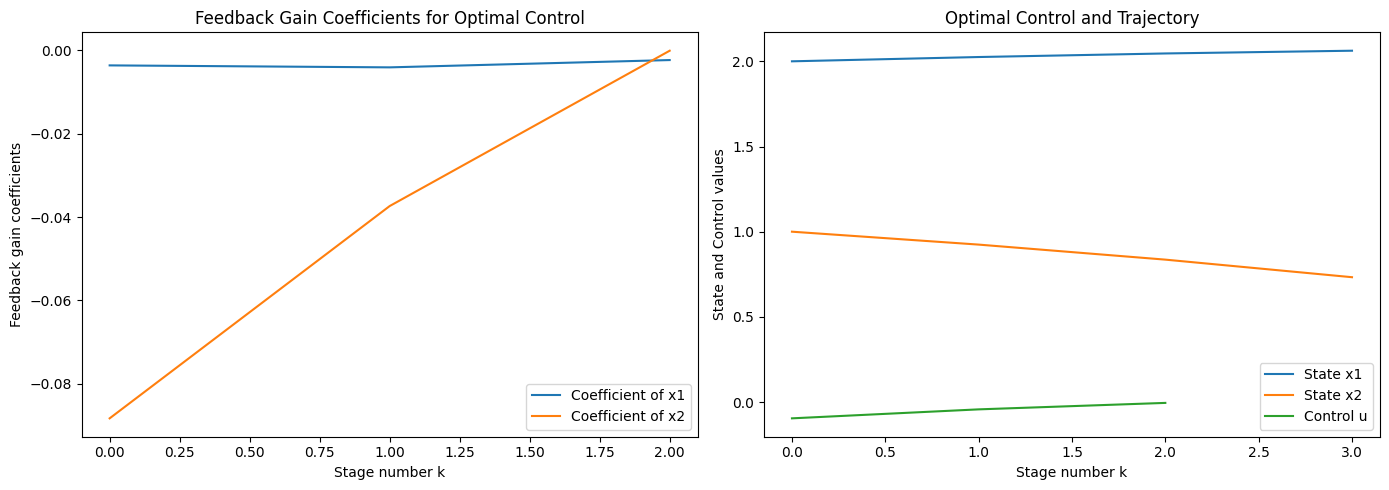

In [5]:
import matplotlib.pyplot as plt

# Plot the feedback gain coefficients for optimal control
plt.figure(figsize=(14, 5))

# Feedback gain F[k][0, 0] represents the first coefficient of the gain matrix at stage k
plt.subplot(1, 2, 1)
plt.plot(range(N), -F[:, 0, 0], label='Coefficient of x1')
plt.plot(range(N), -F[:, 0, 1], label='Coefficient of x2')
plt.title('Feedback Gain Coefficients for Optimal Control')
plt.xlabel('Stage number k')
plt.ylabel('Feedback gain coefficients')
plt.legend()

# Plot the optimal control and trajectory
# Recalculate the state trajectory with the optimal control
x_trajectory = np.zeros((N+1, A.shape[0], 1))
x_trajectory[0] = x0

for k in range(N):
    x_trajectory[k+1] = A @ x_trajectory[k] + B @ u[k]

plt.subplot(1, 2, 2)
plt.plot(range(N+1), x_trajectory[:, 0, 0], label='State x1')
plt.plot(range(N+1), x_trajectory[:, 1, 0], label='State x2')
plt.plot(range(N), u[:, 0, 0], label='Control u')
plt.title('Optimal Control and Trajectory')
plt.xlabel('Stage number k')
plt.ylabel('State and Control values')
plt.legend()

plt.tight_layout()
plt.show()


# N=200

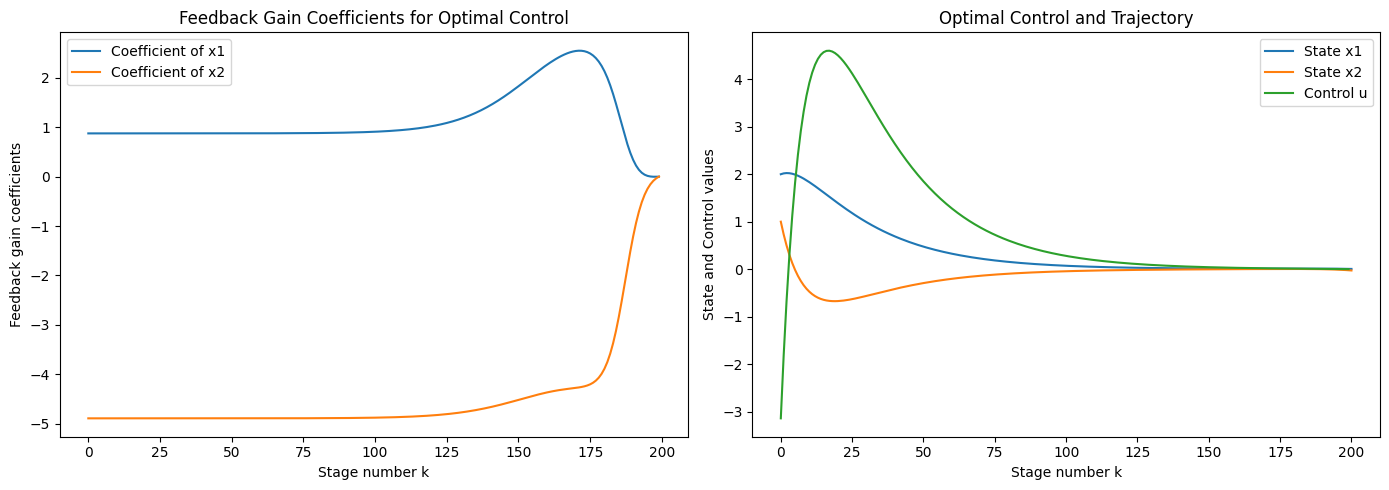

In [13]:
import matplotlib.pyplot as plt

# Plot the feedback gain coefficients for optimal control
plt.figure(figsize=(14, 5))

# Feedback gain F[k][0, 0] represents the first coefficient of the gain matrix at stage k
plt.subplot(1, 2, 1)
plt.plot(range(N), -F[:, 0, 0], label='Coefficient of x1')
plt.plot(range(N), -F[:, 0, 1], label='Coefficient of x2')
plt.title('Feedback Gain Coefficients for Optimal Control')
plt.xlabel('Stage number k')
plt.ylabel('Feedback gain coefficients')
plt.legend()

# Plot the optimal control and trajectory
# Recalculate the state trajectory with the optimal control
x_trajectory = np.zeros((N+1, A.shape[0], 1))
x_trajectory[0] = x0

for k in range(N):
    x_trajectory[k+1] = A @ x_trajectory[k] + B @ u[k]

plt.subplot(1, 2, 2)
plt.plot(range(N+1), x_trajectory[:, 0, 0], label='State x1')
plt.plot(range(N+1), x_trajectory[:, 1, 0], label='State x2')
plt.plot(range(N), u[:, 0, 0], label='Control u')
plt.title('Optimal Control and Trajectory')
plt.xlabel('Stage number k')
plt.ylabel('State and Control values')
plt.legend()

plt.tight_layout()
plt.show()


# قسمت ه

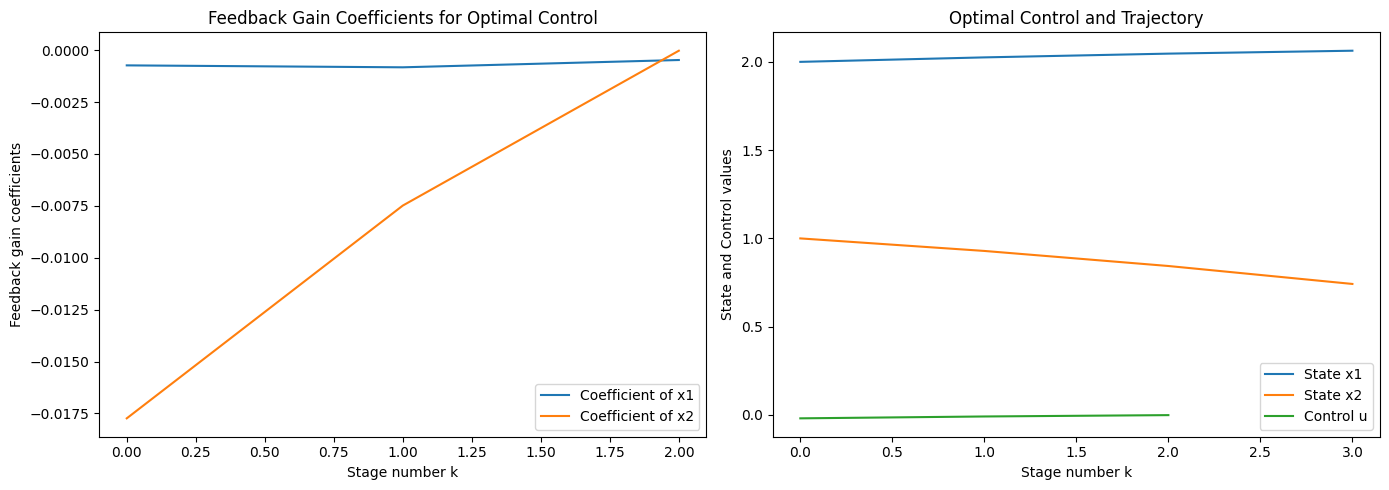

In [23]:
import matplotlib.pyplot as plt

# Plot the feedback gain coefficients for optimal control
plt.figure(figsize=(14, 5))

# Feedback gain F[k][0, 0] represents the first coefficient of the gain matrix at stage k
plt.subplot(1, 2, 1)
plt.plot(range(N), -F[:, 0, 0], label='Coefficient of x1')
plt.plot(range(N), -F[:, 0, 1], label='Coefficient of x2')
plt.title('Feedback Gain Coefficients for Optimal Control')
plt.xlabel('Stage number k')
plt.ylabel('Feedback gain coefficients')
plt.legend()

# Plot the optimal control and trajectory
# Recalculate the state trajectory with the optimal control
x_trajectory = np.zeros((N+1, A.shape[0], 1))
x_trajectory[0] = x0

for k in range(N):
    x_trajectory[k+1] = A @ x_trajectory[k] + B @ u[k]

plt.subplot(1, 2, 2)
plt.plot(range(N+1), x_trajectory[:, 0, 0], label='State x1')
plt.plot(range(N+1), x_trajectory[:, 1, 0], label='State x2')
plt.plot(range(N), u[:, 0, 0], label='Control u')
plt.title('Optimal Control and Trajectory')
plt.xlabel('Stage number k')
plt.ylabel('State and Control values')
plt.legend()

plt.tight_layout()
plt.show()


# infinit horizion

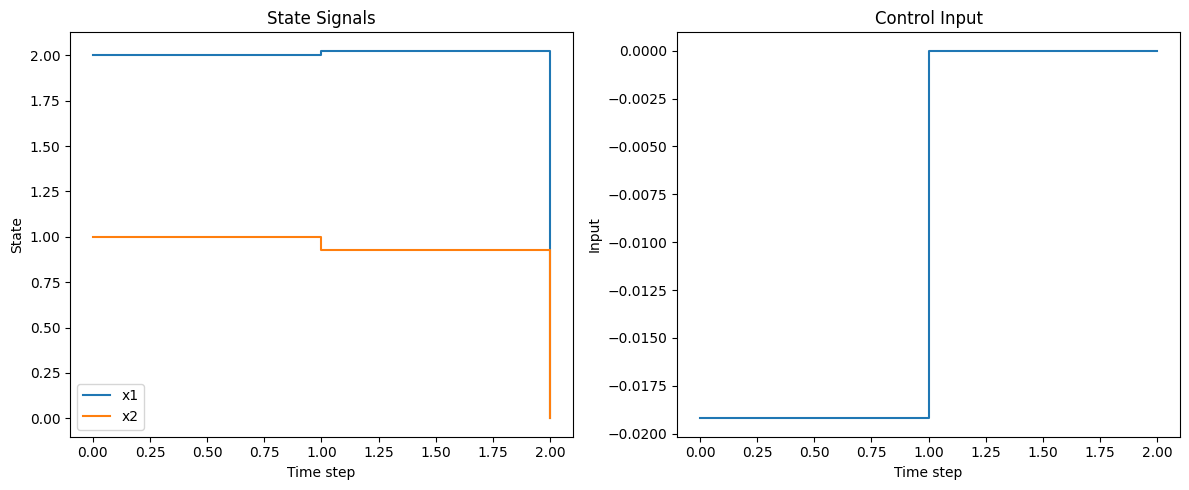

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system matrices
A = np.array([[0.9863, 0.0528],
              [-0.1189, 1.1680]])
B = np.array([[0.0024],
              [0.0628]])

# Define the horizon and initial condition
N = 2  # horizon for the dynamic programming
x0 = np.array([[2], [1]])  # initial condition of the system

# Initialize arrays to store the optimal inputs and states
u_optimal = np.zeros((B.shape[1], N + 1))
x_optimal = np.zeros((A.shape[0], N + 1))
x_optimal[:, [0]] = x0

# Cost function parameters
Q = np.array([[1, 0],
              [0, 0.5]])
R = np.array([[1]])
# Define the terminal cost matrix
Qf = np.array([[1, 0],
               [0, 0]])

# Dynamic programming
P = np.zeros((A.shape[0], A.shape[0], N + 1))
P[:, :, N] = Qf
for k in range(N, 0, -1):
    # Calculate the gain matrix
    K = np.linalg.inv(B.T @ P[:, :, k] @ B + R) @ (B.T @ P[:, :, k] @ A)
    u_optimal[:, [k]] = -K @ x_optimal[:, [k]]
    P[:, :, k - 1] = Q + A.T @ P[:, :, k] @ A - A.T @ P[:, :, k] @ B @ K
    x_optimal[:, [k]] = A @ x_optimal[:, [k]] + B @ u_optimal[:, [k]]

# Calculate the optimal input for k=0
K = np.linalg.inv(B.T @ P[:, :, 0] @ B + R) @ (B.T @ P[:, :, 0] @ A)
u_optimal[:, [0]] = -K @ x_optimal[:, [0]]

# Update state for k=0
x_optimal[:, [1]] = A @ x_optimal[:, [0]] + B @ u_optimal[:, [0]]

# Plot the system state signal and control input
plt.figure(figsize=(12, 5))

# Plot state signals
plt.subplot(1, 2, 1)
plt.step(range(N + 1), x_optimal[0, :], where='post', label='x1')
plt.step(range(N + 1), x_optimal[1, :], where='post', label='x2')
plt.title('State Signals')
plt.xlabel('Time step')
plt.ylabel('State')
plt.legend()

# Plot control input
plt.subplot(1, 2, 2)
plt.step(range(N + 1), u_optimal[0, :], where='post')
plt.title('Control Input')
plt.xlabel('Time step')
plt.ylabel('Input')

plt.tight_layout()
plt.show()



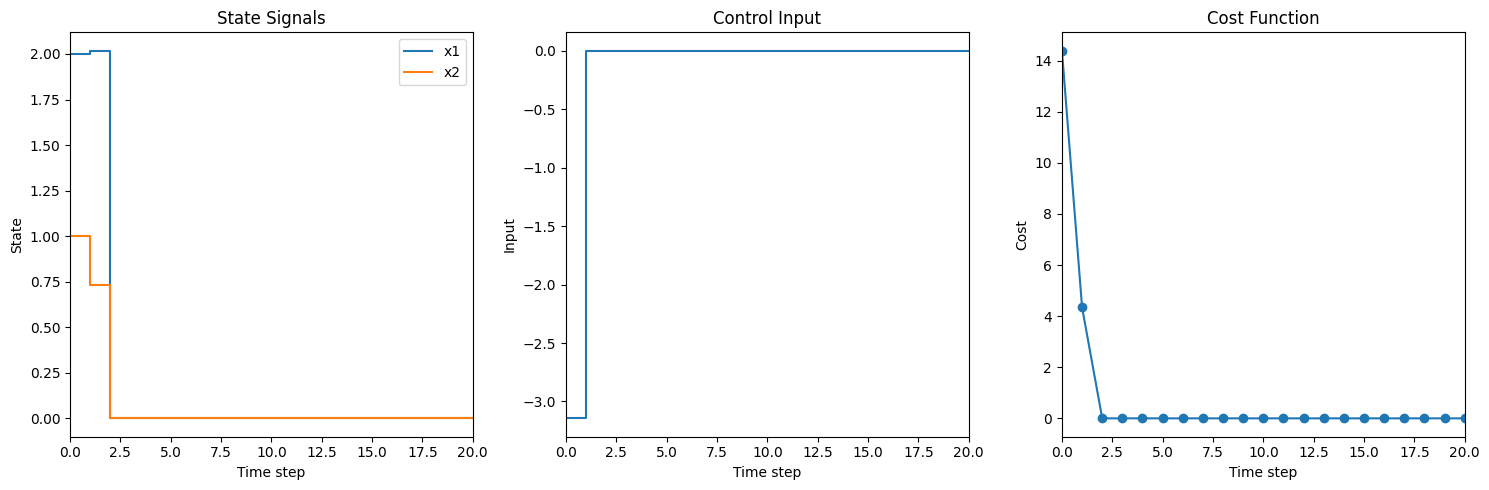

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system matrices
A = np.array([[0.9863, 0.0528],
              [-0.1189, 1.1680]])
B = np.array([[0.0024],
              [0.0628]])

# Define the horizon and initial condition
N = 199  # horizon for the dynamic programming
x0 = np.array([[2], [1]])  # initial condition of the system

# Initialize arrays to store the optimal inputs and states
u_optimal = np.zeros((B.shape[1], N + 1))
x_optimal = np.zeros((A.shape[0], N + 1))
x_optimal[:, [0]] = x0

# Cost function parameters
Q = np.array([[1, 0],
              [0, 0.5]])
R = np.array([[1]])


P_final = np.zeros((A.shape[0], A.shape[0]))

P_final[0, 0] = 1  # This is the weight for (x1(3))^2



# Redefine the cost-to-go matrix P for the correct dimensions including the terminal cost

P = np.zeros((A.shape[0], A.shape[0], N + 1))

P[:, :, -1] = P_final  # Set the final cost-to-go matrix to include only the terminal cost for x1



for k in range(N, 0, -1):
    # Calculate the gain matrix
    K = np.linalg.inv(B.T @ P[:, :, k] @ B + R) @ (B.T @ P[:, :, k] @ A)
    u_optimal[:, [k]] = -K @ x_optimal[:, [k]]
    P[:, :, k - 1] = Q + A.T @ P[:, :, k] @ A - A.T @ P[:, :, k] @ B @ K
    x_optimal[:, [k]] = A @ x_optimal[:, [k]] + B @ u_optimal[:, [k]]

# Calculate the optimal input for k=0
K = np.linalg.inv(B.T @ P[:, :, 0] @ B + R) @ (B.T @ P[:, :, 0] @ A)
u_optimal[:, [0]] = -K @ x_optimal[:, [0]]

# Update state for k=0
x_optimal[:, [1]] = A @ x_optimal[:, [0]] + B @ u_optimal[:, [0]]

# Calculate the cost for each time step
J_k = np.zeros(N + 1)
for k in range(N + 1):
    J_k[k] = (x_optimal[0, k])**2 + 0.5 * (x_optimal[1, k])**2 + (u_optimal[0, k])**2

# Plot the system state signal, control input, and cost
plt.figure(figsize=(15, 5))

# Plot state signals
plt.subplot(1, 3, 1)
plt.step(range(N + 1), x_optimal[0, :], where='post', label='x1')
plt.step(range(N + 1), x_optimal[1, :], where='post', label='x2')
plt.title('State Signals')
plt.xlabel('Time step')
plt.ylabel('State')
plt.legend()
plt.xlim(0, 20)  # Set x-axis range

# Plot control input
plt.subplot(1, 3, 2)
plt.step(range(N + 1), u_optimal[0, :], where='post')
plt.title('Control Input')
plt.xlabel('Time step')
plt.ylabel('Input')
plt.xlim(0, 20)  # Set x-axis range

# Plot cost
plt.subplot(1, 3, 3)
plt.plot(range(N + 1), J_k, marker='o')
plt.title('Cost Function')
plt.xlabel('Time step')
plt.ylabel('Cost')
plt.xlim(0, 20)  # Set x-axis range

plt.tight_layout()
plt.show()
